# KPI

AB testing process
1. Develp a hypothesis about your product or business
2. Randomly assign users to two different group 
3. Expose 
    a. group 1 to the current product rules
    b. group2 to a product that tests the hypothesis
4. Pick whichever performs better according to a set of KPIs

In [15]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
# Import pandas 
import pandas as pd

# Load the customer_data
customer_data = pd.read_csv('../DATASETS/user_demographics_v1.csv')
#customer_data.rename(columns={'reg_date':'date'}, inplace=True)
customer_data['reg_date'] = pd.to_datetime(customer_data['reg_date']).dt.date

# Load the app_purchases
app_purchases = pd.read_csv('../DATASETS/purchase_data_v1.csv')
app_purchases['date'] = pd.to_datetime(app_purchases['date']).dt.date
# Print the columns of customer data
print(customer_data.head())

# Print the columns of app_purchases
print(app_purchases.head())


          uid    reg_date device gender country  age
0  54030035.0  2017-06-29    and      M     USA   19
1  72574201.0  2018-03-05    iOS      F     TUR   22
2  64187558.0  2016-02-07    iOS      M     USA   16
3  92513925.0  2017-05-25    and      M     BRA   41
4  99231338.0  2017-03-26    iOS      M     FRA   59
         date       uid            sku  price
0  2017-07-10  41195147  sku_three_499    499
1  2017-07-15  41195147  sku_three_499    499
2  2017-11-12  41195147   sku_four_599    599
3  2017-09-26  91591874    sku_two_299    299
4  2017-12-01  91591874   sku_four_599    599


In [3]:
uid_combined_data = pd.merge(app_purchases, customer_data, on=['uid'], how='inner')
print(uid_combined_data.head())

         date       uid            sku  price    reg_date device gender  \
0  2017-07-10  41195147  sku_three_499    499  2017-06-26    and      M   
1  2017-07-15  41195147  sku_three_499    499  2017-06-26    and      M   
2  2017-11-12  41195147   sku_four_599    599  2017-06-26    and      M   
3  2017-09-26  91591874    sku_two_299    299  2017-01-05    and      M   
4  2017-12-01  91591874   sku_four_599    599  2017-01-05    and      M   

  country  age  
0     BRA   17  
1     BRA   17  
2     BRA   17  
3     TUR   17  
4     TUR   17  


In [4]:
uid_combined_data.head()

,date,uid,sku,price,reg_date,device,gender,country,age
0,2017-07-10,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17
1,2017-07-15,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17
2,2017-11-12,41195147,sku_four_599,599,2017-06-26,and,M,BRA,17
3,2017-09-26,91591874,sku_two_299,299,2017-01-05,and,M,TUR,17
4,2017-12-01,91591874,sku_four_599,599,2017-01-05,and,M,TUR,17


In [8]:
purchase_price_summary = uid_combined_data.price.agg(['mean', 'median'])
print(purchase_price_summary)

mean      406.772596
median    299.000000
Name: price, dtype: float64


In [9]:
purchase_summary = uid_combined_data.agg({'price': ['mean', 'median'], 'age': ['mean', 'median']})
print(purchase_summary)

             price        age
mean    406.772596  23.922274
median  299.000000  21.000000


In [10]:
purchase_data = uid_combined_data

In [11]:
# Group the data 
grouped_purchase_data = purchase_data.groupby(by = ['device', 'gender'])

# Aggregate the data
purchase_summary = grouped_purchase_data.agg({'price': ['mean', 'median', 'std']})

# Examine the results
print(purchase_summary)

                    price                   
                     mean median         std
device gender                               
and    F       400.747504    299  179.984378
       M       416.237308    499  195.001520
iOS    F       404.435330    299  181.524952
       M       405.272401    299  196.843197


## calculating KPI
we're gonna be calculating the average amount paid per purchase within a user's first 28 days

In [12]:


current_date = pd.to_datetime('2018-03-17')
print(current_date)

2018-03-17 00:00:00


In [13]:
# Compute max_purchase_date 
max_purchase_date = current_date - timedelta(days=28)
print(max_purchase_date)


2018-02-17 00:00:00


In [14]:
# Filter to only include users who registered before our max date
purchase_data_filt = purchase_data[purchase_data.date < max_purchase_date]
print(purchase_data_filt.tail())

            date       uid             sku  price    reg_date device gender  \
9001  2017-09-16  63245432    sku_five_899    899  2016-12-04    and      F   
9002  2017-04-21  36350096  sku_seven_1499    499  2017-04-07    and      M   
9003  2017-06-04  36350096   sku_three_499    499  2017-04-07    and      M   
9004  2017-07-12  36350096     sku_one_199    199  2017-04-07    and      M   
9005  2017-08-01  36350096   sku_three_499    499  2017-04-07    and      M   

     country  age  
9001     FRA   20  
9002     USA   23  
9003     USA   23  
9004     USA   23  
9005     USA   23  


In [15]:
purchase_data_filt[(purchase_data_filt.date <= purchase_data_filt.reg_date + timedelta(days=28))]

,date,uid,sku,price,reg_date,device,gender,country,age
0,2017-07-10,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17
1,2017-07-15,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17
19,2016-05-12,22870987,sku_four_599,599,2016-04-20,iOS,F,BRA,26
34,2017-01-12,88736154,sku_five_899,899,2017-01-08,and,F,BRA,19
92,2016-12-08,45588501,sku_four_599,599,2016-11-27,and,F,USA,49
...,...,...,...,...,...,...,...,...,...
8963,2017-12-19,72267850,sku_three_499,499,2017-11-28,iOS,F,TUR,22
8973,2017-12-20,80500054,sku_four_599,599,2017-12-05,and,M,USA,19
8976,2017-05-16,64796589,sku_two_299,299,2017-04-29,and,F,FRA,17
8998,2016-12-29,63245432,sku_four_599,599,2016-12-04,and,F,FRA,20


In [16]:
purchase_data_filt.price.mean()

407.3279866546901

## another KPI
average purchase by cohort, 

In [17]:

max_reg_date = current_date - timedelta(days=28)

# Find the month 1 values:
month1 = np.where((purchase_data.reg_date < max_reg_date) &
                    (purchase_data.date < purchase_data.reg_date + timedelta(days=28)),
                  purchase_data.price, 
                  np.NaN)
                 
# Update the value in the DataFrame 
purchase_data['month1'] = month1


# Group the data by gender and device 
purchase_data_upd = purchase_data.groupby(by=['gender', 'device'], as_index=False)


purchase_summary = purchase_data_upd.agg(
                        {'month1': ['mean', 'median'],
                        'price': ['mean', 'median']})

print(purchase_summary)

  gender device      month1              price       
                       mean median        mean median
0      F    and  388.204545  299.0  400.747504    299
1      F    iOS  432.587786  499.0  404.435330    299
2      M    and  413.705882  399.0  416.237308    499
3      M    iOS  433.313725  499.0  405.272401    299


# Part 2

In [7]:
user_purchases = uid_combined_data[uid_combined_data['date'] <= uid_combined_data['reg_date'] + timedelta(days=7)]

In [8]:
user_purchases.head()

,date,uid,sku,price,reg_date,device,gender,country,age
34,2017-01-12,88736154,sku_five_899,899,2017-01-08,and,F,BRA,19
111,2017-11-18,64385442,sku_four_599,599,2017-11-11,iOS,F,USA,18
121,2017-10-07,68561600,sku_three_499,499,2017-10-01,and,F,USA,34
154,2016-03-30,94055095,sku_four_599,599,2016-03-30,iOS,F,BRA,16
173,2015-10-28,69627745,sku_one_199,199,2015-10-28,and,F,BRA,18


In [10]:
user_purchases = user_purchases.groupby(by=['reg_date', 'uid']).agg({'price': ['sum']})

In [11]:
user_purchases.head()

,,price
,,sum
reg_date,uid,
2015-04-05,92675588,199
2015-05-04,81751161,299
2015-05-27,83611817,299
2015-05-29,46036537,199
2015-06-04,35592295,499


country_pivot = pd.pivot_table(user_purchases_country, values=['first_week_purchases'], columns=['country'], index=['reg_date'])
print(country_pivot.head())



# seasonality and moving average

In [23]:
daily_revenue = pd.read_csv('../DATASETS/daily_revenue.csv')
daily_revenue['date'] =pd.to_datetime(daily_revenue['date']).dt.date
daily_revenue.head()

,index,gender,device,revenue,date,country
0,1,male,ios,186557.0,2013-09-20,USA
1,2,male,ios,177217.0,2013-09-21,USA
2,3,male,ios,177197.0,2013-09-22,USA
3,4,male,ios,157193.0,2013-09-23,USA
4,5,male,ios,165592.0,2013-09-24,USA


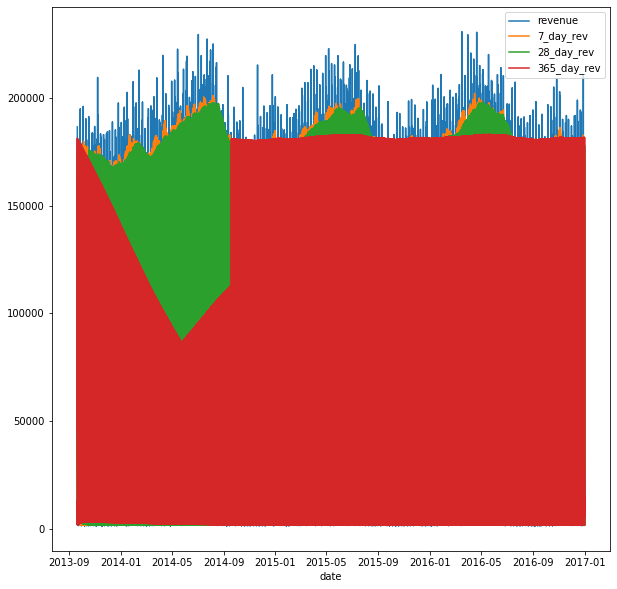

In [33]:
# Compute 7_day_rev
daily_revenue['7_day_rev'] = daily_revenue.revenue.rolling(window=7,center=False).mean()

# Compute 28_day_rev
daily_revenue['28_day_rev'] = daily_revenue.revenue.rolling(window=28,center=False).mean()
    
# Compute 365_day_rev
daily_revenue['365_day_rev'] = daily_revenue.revenue.rolling(window=365,center=False).mean()
    
# Plot date, and revenue, along with the 3 rolling functions (in order)    
daily_revenue.plot(x='date', y=['revenue', '7_day_rev', '28_day_rev', '365_day_rev', ], figsize=(10,10))
plt.show()

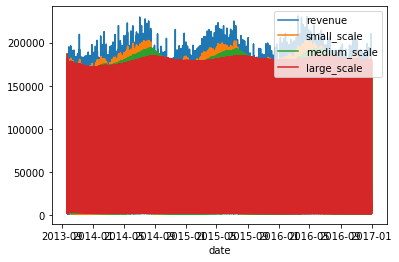

In [34]:
# Calculate 'small_scale'
daily_revenue['small_scale'] = daily_revenue.revenue.ewm(span=10).mean()

# Calculate 'medium_scale'
daily_revenue['medium_scale'] = daily_revenue.revenue.ewm(span=100).mean()

# Calculate 'large_scale'
daily_revenue['large_scale'] = daily_revenue.revenue.ewm(span=500).mean()

# Plot 'date' on the x-axis and, our three averages and 'revenue'
# on the y-axis
daily_revenue.plot(x = 'date', y =['revenue', 'small_scale', 'medium_scale', 'large_scale'])
plt.show()

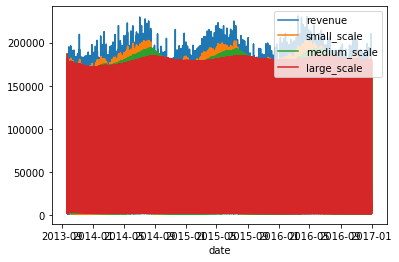

In [35]:
# Calculate 'small_scale'
daily_revenue['small_scale'] = daily_revenue.revenue.ewm(span=10).mean()

# Calculate 'medium_scale'
daily_revenue['medium_scale'] = daily_revenue.revenue.ewm(span=100).mean()

# Calculate 'large_scale'
daily_revenue['large_scale'] = daily_revenue.revenue.ewm(span=500).mean()

# Plot 'date' on the x-axis and, our three averages and 'revenue'
# on the y-axis
daily_revenue.plot(x = 'date', y =['revenue', 'small_scale', 'medium_scale', 'large_scale'])
plt.show()